In [1]:
from keras.models import Sequential, load_model
from keras import layers
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from keras.optimizers import adam, RMSprop
import keras.backend as K
from keras.callbacks import TensorBoard
from time import time
import tensorflow as tf
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score, accuracy_score
from keras.utils import to_categorical
from keras.metrics import binary_accuracy


C:\Users\roberto\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = pd.read_csv("D:/MBIT-2017-18-Master-Deep-Learning/ADNI-Alzheimer/ADNI_QT-PAD/pacientes_latentes2.csv", sep=';',decimal=",")


In [3]:
print(data.shape)

(1161, 22)


In [4]:
data.head()

,RID,DX.bl,DX,Age.bl,latente-x-bl,latente-y-bl,Age-m06,latente-x-m06,latente-y-m06,Age-m12,...,Age-m24,latente-x-m24,latente-y-m24,Target,dif-x-06,dif-y-06,dif-x-12,dif-y-12,dif-x-24,dif-y-24
0,3,AD,Dementia,81.3,-0.2,-1.3,81.8,-0.2,-1.6,82.3,...,83.3,-0.2,-2.1,1,0.0,-0.3,0.1,-0.2,-0.1,-0.3
1,5,CN,NL,73.7,1.9,0.2,74.2,1.2,0.0,74.7,...,75.7,1.2,0.0,0,-0.7,-0.2,-0.3,0.6,0.3,-0.6
2,6,LMCI,MCI,80.4,-1.0,-0.5,80.9,-0.9,-0.5,81.4,...,82.3,-0.9,-0.5,1,0.1,0.0,0.0,0.0,0.0,0.0
3,7,AD,Dementia,75.4,0.3,-2.2,75.9,0.2,-2.2,76.4,...,77.4,0.2,-2.8,1,-0.1,0.0,0.0,0.1,0.0,-0.7
4,10,AD,Dementia,73.9,-1.7,-1.0,74.4,-1.5,-0.9,74.9,...,75.9,-1.5,-1.6,1,0.2,0.1,0.0,-0.5,0.0,-0.2


In [8]:
x_data=data.iloc[:,[4,5,7,8,10,11,13,14,16,17,18,19,20,21]]
y_data=data.iloc[:,15:16]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=42)
scaler = StandardScaler().fit(x_data)
x_data = scaler.transform(x_data)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(928, 14)
(928, 1)
(233, 14)
(233, 1)


In [15]:
# numero neuronas capas ocultas
h1 = 500
h2 = 250
h3 = 100
h4 = 50
h5 = 25

d=0.15

print('Construyendo el modelo')

model = Sequential()
model.add(layers.Dense(x_train.shape[-1],input_shape=(x_train.shape[-1],), activation='relu'))
model.add(layers.Dense(h1, activation='relu'))
model.add(layers.Dense(h2, activation='relu'))
model.add(layers.Dense(h3, activation='relu'))
model.add(Dropout(d))
model.add(layers.Dense(h4, activation='relu'))
model.add(Dropout(d))
model.add(layers.Dense(h5, activation='relu'))
model.add(Dropout(d))
model.add(layers.Dense(y_train.shape[-1], activation='sigmoid'))
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=[binary_accuracy])
model.summary()


Construyendo el modelo
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 14)                210       
_________________________________________________________________
dense_16 (Dense)             (None, 500)               7500      
_________________________________________________________________
dense_17 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_18 (Dense)             (None, 100)               25100     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)              

In [16]:
checkpointer = ModelCheckpoint('demo2_ADNI_model.h5', monitor='val_binary_accuracy', verbose=1, save_best_only=True, mode='max')
results = model.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=512, epochs=500, shuffle=True, verbose=0, callbacks=[checkpointer])
model = load_model('demo2_ADNI_model.h5')
model.save_weights('demo2_ADNI_weights.h5')


Epoch 00001: val_binary_accuracy improved from -inf to 0.71674, saving model to demo2_ADNI_model.h5

Epoch 00002: val_binary_accuracy did not improve from 0.71674

Epoch 00003: val_binary_accuracy did not improve from 0.71674

Epoch 00004: val_binary_accuracy did not improve from 0.71674

Epoch 00005: val_binary_accuracy did not improve from 0.71674

Epoch 00006: val_binary_accuracy did not improve from 0.71674

Epoch 00007: val_binary_accuracy did not improve from 0.71674

Epoch 00008: val_binary_accuracy did not improve from 0.71674

Epoch 00009: val_binary_accuracy did not improve from 0.71674

Epoch 00010: val_binary_accuracy improved from 0.71674 to 0.72532, saving model to demo2_ADNI_model.h5

Epoch 00011: val_binary_accuracy improved from 0.72532 to 0.73820, saving model to demo2_ADNI_model.h5

Epoch 00012: val_binary_accuracy did not improve from 0.73820

Epoch 00013: val_binary_accuracy improved from 0.73820 to 0.75966, saving model to demo2_ADNI_model.h5

Epoch 00014: val_bi


Epoch 00130: val_binary_accuracy did not improve from 0.78112

Epoch 00131: val_binary_accuracy did not improve from 0.78112

Epoch 00132: val_binary_accuracy did not improve from 0.78112

Epoch 00133: val_binary_accuracy did not improve from 0.78112

Epoch 00134: val_binary_accuracy did not improve from 0.78112

Epoch 00135: val_binary_accuracy did not improve from 0.78112

Epoch 00136: val_binary_accuracy did not improve from 0.78112

Epoch 00137: val_binary_accuracy did not improve from 0.78112

Epoch 00138: val_binary_accuracy did not improve from 0.78112

Epoch 00139: val_binary_accuracy did not improve from 0.78112

Epoch 00140: val_binary_accuracy did not improve from 0.78112

Epoch 00141: val_binary_accuracy did not improve from 0.78112

Epoch 00142: val_binary_accuracy did not improve from 0.78112

Epoch 00143: val_binary_accuracy did not improve from 0.78112

Epoch 00144: val_binary_accuracy did not improve from 0.78112

Epoch 00145: val_binary_accuracy did not improve from 


Epoch 00267: val_binary_accuracy did not improve from 0.78112

Epoch 00268: val_binary_accuracy did not improve from 0.78112

Epoch 00269: val_binary_accuracy did not improve from 0.78112

Epoch 00270: val_binary_accuracy did not improve from 0.78112

Epoch 00271: val_binary_accuracy did not improve from 0.78112

Epoch 00272: val_binary_accuracy did not improve from 0.78112

Epoch 00273: val_binary_accuracy did not improve from 0.78112

Epoch 00274: val_binary_accuracy did not improve from 0.78112

Epoch 00275: val_binary_accuracy did not improve from 0.78112

Epoch 00276: val_binary_accuracy did not improve from 0.78112

Epoch 00277: val_binary_accuracy did not improve from 0.78112

Epoch 00278: val_binary_accuracy did not improve from 0.78112

Epoch 00279: val_binary_accuracy did not improve from 0.78112

Epoch 00280: val_binary_accuracy did not improve from 0.78112

Epoch 00281: val_binary_accuracy did not improve from 0.78112

Epoch 00282: val_binary_accuracy did not improve from 


Epoch 00403: val_binary_accuracy did not improve from 0.78112

Epoch 00404: val_binary_accuracy did not improve from 0.78112

Epoch 00405: val_binary_accuracy did not improve from 0.78112

Epoch 00406: val_binary_accuracy did not improve from 0.78112

Epoch 00407: val_binary_accuracy did not improve from 0.78112

Epoch 00408: val_binary_accuracy did not improve from 0.78112

Epoch 00409: val_binary_accuracy did not improve from 0.78112

Epoch 00410: val_binary_accuracy did not improve from 0.78112

Epoch 00411: val_binary_accuracy did not improve from 0.78112

Epoch 00412: val_binary_accuracy did not improve from 0.78112

Epoch 00413: val_binary_accuracy did not improve from 0.78112

Epoch 00414: val_binary_accuracy did not improve from 0.78112

Epoch 00415: val_binary_accuracy did not improve from 0.78112

Epoch 00416: val_binary_accuracy did not improve from 0.78112

Epoch 00417: val_binary_accuracy did not improve from 0.78112

Epoch 00418: val_binary_accuracy did not improve from 

In [17]:
model = load_model('demo2_ADNI_model.h5')
model.load_weights('demo2_ADNI_weights.h5')

In [18]:
loss_train, score_train = model.evaluate(x_train, y_train, verbose=0)
print()
print("Loss  in training  :", loss_train)
print("Score in training  :", score_train)



Loss  in training  : 0.396840573384844
Score in training  : 0.7801724137931034


In [19]:
loss_test, score_test = model.evaluate(x_test, y_test, verbose=0)
print()
print("Loss  in training  :", loss_test)
print("Score in training  :", score_test)


Loss  in training  : 0.43638230853837956
Score in training  : 0.781115880339954


In [20]:
y_pred_rnn = np.round(model.predict(x_data))
print(y_pred_rnn[0:5])
print(y_data[0:5])


[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
   Target
0       1
1       0
2       1
3       1
4       1


In [21]:
print("matriz de confusión")
print(confusion_matrix(y_data, y_pred_rnn))
print("accuracy_score")
print(accuracy_score(y_data, y_pred_rnn))


matriz de confusión
[[215 113]
 [142 691]]
accuracy_score
0.7803617571059431


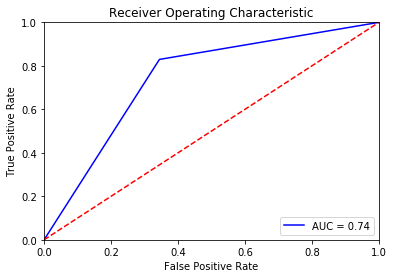

In [22]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_data, y_pred_rnn)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# RAMDOM FOREST

In [23]:
def compute_regr_ensemble_preds(ensemble, x):
    L = ensemble.n_estimators
    individual_preds = np.zeros((np.shape(x)[0],L))
    for i in np.arange(L):
        estimator = ensemble.estimators_[i]
        individual_preds[:,i] = estimator.predict(x)
    
    preds = np.mean(individual_preds, axis=1)
    preds_std = np.std(individual_preds, axis=1, ddof=1)
    return preds, preds_std, individual_preds

In [24]:
# Now we constuct a Random Forest Regressor model

from sklearn.ensemble import RandomForestClassifier

rf_Classifier = RandomForestClassifier(max_depth=9, random_state=2,
                                      n_estimators=500)
rf_Classifier.fit(x_train, y_train)

# performance of the regression in training set

print("\n** Random Forest Classifier, %d estimators **\n" % rf_Classifier.n_estimators)

print('attribute importances:')
print(rf_Classifier.feature_importances_)
print()

print("Mean absolute error in training: %.2f"
      % np.mean(np.abs(rf_Classifier.predict(x_train).reshape((y_train.shape[0],1)) - y_train)))
print("Maximum absolute error in training: %.2f"
      % np.max(np.abs(rf_Classifier.predict(x_train).reshape((y_train.shape[0],1)) - y_train)))
print('Explained variance score in training (1: perfect): %.2f' % rf_Classifier.score(x_train, y_train))
print()

# performance of the Classifier in test set
print("Mean absolute error in test: %.2f"
      % np.mean(np.abs(rf_Classifier.predict(x_test).reshape((y_test.shape[0],1)) - y_test)))
print("Maximum absolute error in test: %.2f"
      % np.max(np.abs(rf_Classifier.predict(x_test).reshape((y_test.shape[0],1)) - y_test)))
print('Explained variance score in test (1: perfect): %.2f' % rf_Classifier.score(x_test, y_test))
print()

C:\Users\roberto\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys



** Random Forest Classifier, 500 estimators **

attribute importances:
[0.04509733 0.11697935 0.03987025 0.12742054 0.04343421 0.14596743
 0.05237265 0.17055982 0.03619157 0.05140786 0.03519008 0.05190422
 0.03230341 0.05130126]

Mean absolute error in training: 0.05
Maximum absolute error in training: 1.00
Explained variance score in training (1: perfect): 0.95

Mean absolute error in test: 0.23
Maximum absolute error in test: 1.00
Explained variance score in test (1: perfect): 0.77



In [25]:
y_pred_rf = np.round(rf_Classifier.predict(x_data).reshape((y_data.shape[0],1)))
print(y_pred_rf[0:5])
print(y_data[0:5])

[[1]
 [0]
 [1]
 [1]
 [1]]
   Target
0       1
1       0
2       1
3       1
4       1


In [26]:
print("matriz de confusión")
print(confusion_matrix(y_data, np.round(y_pred_rf)))
print("accuracy_score")
print(accuracy_score(y_data, np.round(y_pred_rf)))

matriz de confusión
[[298  30]
 [ 68 765]]
accuracy_score
0.9155900086132644


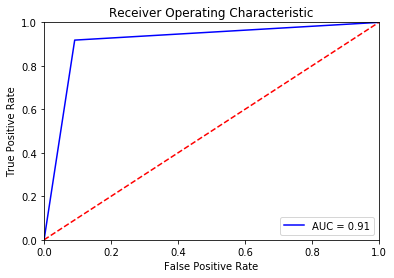

In [27]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_data, y_pred_rf)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# ADABOOST

In [28]:
from sklearn.ensemble import AdaBoostClassifier

ab_Classifier = AdaBoostClassifier(n_estimators=250)
print(ab_Classifier)

ab_Classifier.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=250, random_state=None)


C:\Users\roberto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=250, random_state=None)

In [29]:
# performance of the Classifier in training set

print("\n** Results with Adaboost, %d estimators **\n" % ab_Classifier.n_estimators)
print("Mean absolute error in training: %.2f"
      % np.mean(np.abs(ab_Classifier.predict(x_train).reshape((y_train.shape[0],1)) - y_train)))
print("Maximum absolute error in training: %.2f"
      % np.max(np.abs(ab_Classifier.predict(x_train).reshape((y_train.shape[0],1)) - y_train)))
print('Explained variance score in training (1: perfect): %.2f' % ab_Classifier.score(x_train, y_train))

print()

# performance of the Classifier in test set
print("Mean absolute error in test: %.2f"
      % np.mean(np.abs(ab_Classifier.predict(x_test).reshape((y_test.shape[0],1)) - y_test)))
print("Maximum absolute error in test: %.2f"
      % np.max(np.abs(ab_Classifier.predict(x_test).reshape((y_test.shape[0],1)) - y_test)))
print('Explained variance score in test (1: perfect): %.2f' % ab_Classifier.score(x_test, y_test))
print()


** Results with Adaboost, 250 estimators **

Mean absolute error in training: 0.10
Maximum absolute error in training: 1.00
Explained variance score in training (1: perfect): 0.90

Mean absolute error in test: 0.24
Maximum absolute error in test: 1.00
Explained variance score in test (1: perfect): 0.76



In [30]:
y_pred_ab = np.round(ab_Classifier.predict(x_data).reshape((y_data.shape[0],1)))
print(y_pred_ab[0:5])
print(y_data[0:5])

[[1]
 [1]
 [1]
 [1]
 [1]]
   Target
0       1
1       0
2       1
3       1
4       1


In [31]:
print("matriz de confusión")
print(confusion_matrix(y_data, np.round(y_pred_ab)))
print("accuracy_score")
print(accuracy_score(y_data, np.round(y_pred_ab)))

matriz de confusión
[[257  71]
 [ 80 753]]
accuracy_score
0.8699397071490095


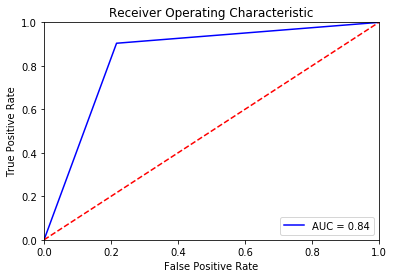

In [32]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_data, y_pred_ab)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# GRADIENT BOOSTING

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

gb_Classifier = GradientBoostingClassifier(n_estimators=500, max_depth=4,
                                          min_samples_split=2,
                                          learning_rate=0.01, loss='deviance')
gb_Classifier.fit(x_train, y_train)

C:\Users\roberto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [34]:
# performance of the Classifier in training set

print("\n** Results with Gradient Boosting, %d estimators **\n" % gb_Classifier.n_estimators)
print("Mean absolute error in training: %.2f"
      % np.mean(np.abs(gb_Classifier.predict(x_train).reshape((y_train.shape[0],1)) - y_train)))
print("Maximum absolute error in training: %.2f"
      % np.max(np.abs(gb_Classifier.predict(x_train).reshape((y_train.shape[0],1)) - y_train)))
print('Explained variance score in training (1: perfect): %.2f' % gb_Classifier.score(x_train, y_train))

print()

# performance of the Classifier in test set
print("Mean absolute error in test: %.2f"
      % np.mean(np.abs(gb_Classifier.predict(x_test).reshape((y_test.shape[0],1)) - y_test)))
print("Maximum absolute error in test: %.2f"
      % np.max(np.abs(gb_Classifier.predict(x_test).reshape((y_test.shape[0],1)) - y_test)))
print('Explained variance score in test (1: perfect): %.2f' % gb_Classifier.score(x_test, y_test))
print()


** Results with Gradient Boosting, 500 estimators **

Mean absolute error in training: 0.09
Maximum absolute error in training: 1.00
Explained variance score in training (1: perfect): 0.91

Mean absolute error in test: 0.21
Maximum absolute error in test: 1.00
Explained variance score in test (1: perfect): 0.79



In [35]:
y_pred_gb = np.round(gb_Classifier.predict(x_data).reshape((y_data.shape[0],1)))
print(y_pred_gb[0:5])
print(y_data[0:5])

[[1]
 [1]
 [1]
 [1]
 [1]]
   Target
0       1
1       0
2       1
3       1
4       1


In [36]:
print("matriz de confusión")
print(confusion_matrix(y_data, np.round(y_pred_gb)))
print("accuracy_score")
print(accuracy_score(y_data, np.round(y_pred_gb)))

matriz de confusión
[[268  60]
 [ 70 763]]
accuracy_score
0.8880275624461671


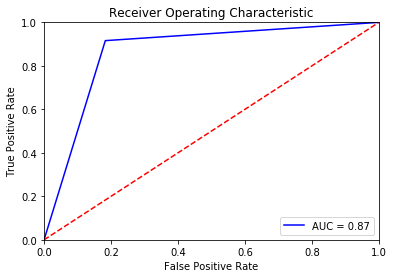

In [37]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_data, y_pred_gb)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# RANDOM FOREST (ADJUSTMENT PARAMETERS)

In [38]:
rf = RandomForestClassifier(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [39]:
# https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/random_forest_explained/Improving%20Random%20Forest%20Part%202.ipynb
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [40]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error',
                              cv = 4, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(x_train, y_train);

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  5.3min finished
C:\Users\roberto\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [41]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1600}

In [42]:
best_random = rf_random.best_estimator_

In [43]:
# performance of the regression in training set

print("Mean absolute error in training: %.2f"
      % np.mean(np.abs(best_random.predict(x_train).reshape((y_train.shape[0],1)) - y_train)))
print("Maximum absolute error in training: %.2f"
      % np.max(np.abs(best_random.predict(x_train).reshape((y_train.shape[0],1)) - y_train)))
print('Explained variance score in training (1: perfect): %.2f' % best_random.score(x_train, y_train))

print()

# performance of the regression in test set
print("Mean absolute error in test: %.2f"
      % np.mean(np.abs(best_random.predict(x_test).reshape((y_test.shape[0],1)) - y_test)))
print("Maximum absolute error in test: %.2f"
      % np.max(np.abs(best_random.predict(x_test).reshape((y_test.shape[0],1)) - y_test)))
print('Explained variance score in test (1: perfect): %.2f' % best_random.score(x_test, y_test))
print()

Mean absolute error in training: 0.04
Maximum absolute error in training: 1.00
Explained variance score in training (1: perfect): 0.96

Mean absolute error in test: 0.22
Maximum absolute error in test: 1.00
Explained variance score in test (1: perfect): 0.78



In [44]:
y_pred_best_rf = np.round(best_random.predict(x_data).reshape((y_data.shape[0],1)))
print(y_pred_best_rf[0:5])
print(y_data[0:5])

[[1]
 [0]
 [1]
 [1]
 [1]]
   Target
0       1
1       0
2       1
3       1
4       1


In [45]:
print("matriz de confusión")
print(confusion_matrix(y_data, np.round(y_pred_best_rf)))
print("accuracy_score")
print(accuracy_score(y_data, np.round(y_pred_best_rf)))

matriz de confusión
[[305  23]
 [ 66 767]]
accuracy_score
0.9233419465977606


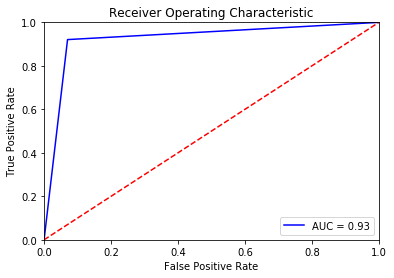

In [46]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_data, y_pred_best_rf)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# GRADIENT BOOSTING (ADJUSTMENT PARAMETERS)

In [47]:
gb = GradientBoostingClassifier(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': 42,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}


In [48]:
# https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/random_forest_explained/Improving%20Random%20Forest%20Part%202.ipynb
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# learning_rate
learning_rate = [0.001, 0.0001, 0.00001]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': learning_rate}

pprint(random_grid)

{'learning_rate': [0.001, 0.0001, 1e-05],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [49]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
gb = GradientBoostingClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gb_random = RandomizedSearchCV(estimator=gb, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 4, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
gb_random.fit(x_train, y_train);

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 12.1min finished
C:\Users\roberto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
gb_random.best_params_

{'learning_rate': 0.001,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 2000}

In [51]:
best_random = gb_random.best_estimator_

In [52]:
# performance of the regression in training set

print("Mean absolute error in training: %.2f"
      % np.mean(np.abs(best_random.predict(x_train).reshape((y_train.shape[0],1)) - y_train)))
print("Maximum absolute error in training: %.2f"
      % np.max(np.abs(best_random.predict(x_train).reshape((y_train.shape[0],1)) - y_train)))
print('Explained variance score in training (1: perfect): %.2f' % best_random.score(x_train, y_train))

print()

# performance of the regression in test set
print("Mean absolute error in test: %.2f"
      % np.mean(np.abs(best_random.predict(x_test).reshape((y_test.shape[0],1)) - y_test)))
print("Maximum absolute error in test: %.2f"
      % np.max(np.abs(best_random.predict(x_test).reshape((y_test.shape[0],1)) - y_test)))
print('Explained variance score in test (1: perfect): %.2f' % best_random.score(x_test, y_test))
print()

Mean absolute error in training: 0.00
Maximum absolute error in training: 0.00
Explained variance score in training (1: perfect): 1.00

Mean absolute error in test: 0.25
Maximum absolute error in test: 1.00
Explained variance score in test (1: perfect): 0.75



In [53]:
y_pred_best_gb = np.round(best_random.predict(x_data).reshape((y_data.shape[0],1)))
print(y_pred_best_gb[0:5])
print(y_data[0:5])

[[1]
 [0]
 [1]
 [1]
 [1]]
   Target
0       1
1       0
2       1
3       1
4       1


In [54]:
print("matriz de confusión")
print(confusion_matrix(y_data, np.round(y_pred_best_gb)))
print("accuracy_score")
print(accuracy_score(y_data, np.round(y_pred_best_gb)))

matriz de confusión
[[290  38]
 [ 20 813]]
accuracy_score
0.9500430663221361


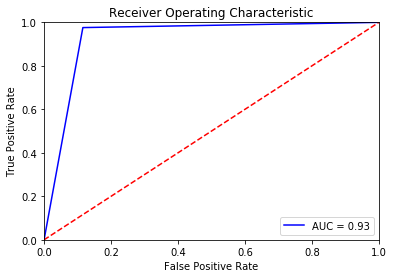

In [56]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_data, y_pred_best_gb)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# ADA BOOST (ADJUSTMENT PARAMETERS)

In [57]:
ab = AdaBoostClassifier(random_state=42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(ab.get_params())

Parameters currently in use:

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}


In [58]:
# https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/random_forest_explained/Improving%20Random%20Forest%20Part%202.ipynb
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
# algorithm
algorithm = ['SAMME','SAMME.R']
# learning_rate
learning_rate = [1, 0.5, 0.1, 0.01, 0.05, 0.001]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'algorithm': algorithm,
               'learning_rate': learning_rate}

pprint(random_grid)

{'algorithm': ['SAMME', 'SAMME.R'],
 'learning_rate': [1, 0.5, 0.1, 0.01, 0.05, 0.001],
 'n_estimators': [100,
                  200,
                  300,
                  400,
                  500,
                  600,
                  700,
                  800,
                  900,
                  1000,
                  1100,
                  1200,
                  1300,
                  1400,
                  1500,
                  1600,
                  1700,
                  1800,
                  1900,
                  2000]}


In [59]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
ab = AdaBoostClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
ab_random = RandomizedSearchCV(estimator=ab, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error',
                              cv = 4, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
ab_random.fit(x_train, y_train);

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  4.4min finished
C:\Users\roberto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
ab_random.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.001, 'n_estimators': 1600}

In [61]:
best_random = ab_random.best_estimator_

In [62]:
# performance of the regression in training set

print("Mean absolute error in training: %.2f"
      % np.mean(np.abs(best_random.predict(x_train).reshape((y_train.shape[0],1)) - y_train)))
print("Maximum absolute error in training: %.2f"
      % np.max(np.abs(best_random.predict(x_train).reshape((y_train.shape[0],1)) - y_train)))
print('Explained variance score in training (1: perfect): %.2f' % best_random.score(x_train, y_train))

print()

# performance of the regression in test set
print("Mean absolute error in test: %.2f"
      % np.mean(np.abs(best_random.predict(x_test).reshape((y_test.shape[0],1)) - y_test)))
print("Maximum absolute error in test: %.2f"
      % np.max(np.abs(best_random.predict(x_test).reshape((y_test.shape[0],1)) - y_test)))
print('Explained variance score in test (1: perfect): %.2f' % best_random.score(x_test, y_test))
print()

Mean absolute error in training: 0.24
Maximum absolute error in training: 1.00
Explained variance score in training (1: perfect): 0.76

Mean absolute error in test: 0.25
Maximum absolute error in test: 1.00
Explained variance score in test (1: perfect): 0.75



In [63]:
y_pred_best_ab = np.round(best_random.predict(x_data).reshape((y_data.shape[0],1)))
print(y_pred_best_ab[0:5])
print(y_data[0:5])

[[1]
 [1]
 [1]
 [1]
 [1]]
   Target
0       1
1       0
2       1
3       1
4       1


In [64]:
print("matriz de confusión")
print(confusion_matrix(y_data, np.round(y_pred_best_ab)))
print("accuracy_score")
print(accuracy_score(y_data, np.round(y_pred_best_ab)))

matriz de confusión
[[197 131]
 [146 687]]
accuracy_score
0.7614125753660638


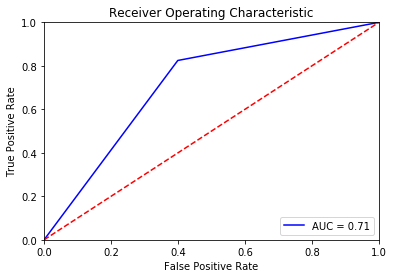

In [65]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_data, y_pred_best_ab)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# DIFERENCIAS DEL MEJOR MODELO

In [66]:
diference_gb = y_data - y_pred_best_gb


In [68]:
data["y_pred_gb"] = y_pred_best_gb
data["dif_gb"] = diference_gb

In [69]:
data.head()

,RID,DX.bl,DX,Age.bl,latente-x-bl,latente-y-bl,Age-m06,latente-x-m06,latente-y-m06,Age-m12,...,latente-y-m24,Target,dif-x-06,dif-y-06,dif-x-12,dif-y-12,dif-x-24,dif-y-24,y_pred_gb,dif_gb
0,3,AD,Dementia,81.3,-0.2,-1.3,81.8,-0.2,-1.6,82.3,...,-2.1,1,0.0,-0.3,0.1,-0.2,-0.1,-0.3,1,0
1,5,CN,NL,73.7,1.9,0.2,74.2,1.2,0.0,74.7,...,0.0,0,-0.7,-0.2,-0.3,0.6,0.3,-0.6,0,0
2,6,LMCI,MCI,80.4,-1.0,-0.5,80.9,-0.9,-0.5,81.4,...,-0.5,1,0.1,0.0,0.0,0.0,0.0,0.0,1,0
3,7,AD,Dementia,75.4,0.3,-2.2,75.9,0.2,-2.2,76.4,...,-2.8,1,-0.1,0.0,0.0,0.1,0.0,-0.7,1,0
4,10,AD,Dementia,73.9,-1.7,-1.0,74.4,-1.5,-0.9,74.9,...,-1.6,1,0.2,0.1,0.0,-0.5,0.0,-0.2,1,0


In [70]:
data.loc[(data['dif_gb'] == 1)].head(25)

,RID,DX.bl,DX,Age.bl,latente-x-bl,latente-y-bl,Age-m06,latente-x-m06,latente-y-m06,Age-m12,...,latente-y-m24,Target,dif-x-06,dif-y-06,dif-x-12,dif-y-12,dif-x-24,dif-y-24,y_pred_gb,dif_gb
70,138,LMCI,MCI,86.3,-0.1,0.6,86.8,-0.1,0.6,87.3,...,0.5,1,0.0,0.0,-0.1,-0.3,0.1,0.2,0,1
78,158,LMCI,MCI,80.4,-1.0,0.1,80.9,-1.0,0.4,81.4,...,0.3,1,0.0,0.3,0.1,-0.5,0.0,0.4,0,1
96,188,LMCI,MCI,86.1,0.2,0.1,86.6,0.1,0.4,87.1,...,0.5,1,-0.1,0.3,0.1,-0.2,-0.2,0.3,0,1
405,908,LMCI,MCI,62.9,-1.0,2.4,63.4,-1.1,2.3,63.9,...,2.0,1,-0.1,-0.1,0.0,-0.2,-0.1,-0.1,0,1
477,1075,LMCI,MCI,67.1,2.1,1.8,67.7,2.1,1.7,68.3,...,1.7,1,0.0,-0.1,-0.5,-0.2,0.5,0.2,0,1
486,1098,CN,MCI to Dementia,72.0,-1.4,0.4,72.5,-0.7,1.7,73.0,...,1.0,1,0.7,1.3,-0.1,-0.2,-0.5,-0.5,0,1
618,2031,EMCI,MCI,72.5,1.0,0.5,72.9,0.9,0.8,73.4,...,0.4,1,-0.1,0.3,0.2,0.0,0.2,-0.4,0,1
622,2045,EMCI,MCI,72.3,2.0,1.6,72.7,2.1,1.5,73.3,...,1.4,1,0.1,-0.1,-0.3,0.0,0.1,-0.1,0,1
777,4159,EMCI,MCI,71.0,-0.3,1.6,71.5,-0.6,1.1,72.0,...,1.6,1,-0.3,-0.5,0.2,0.5,0.2,0.0,0,1
798,4194,LMCI,MCI,62.0,0.9,0.4,62.5,0.8,0.6,63.0,...,0.7,1,-0.1,0.2,-0.2,0.4,0.2,-0.3,0,1
